### Install pycaret

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.9 MB/s eta 0:0

### Loading dataset

In [5]:
from pycaret.datasets import get_data
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving IMDB.csv to IMDB (1).csv


## Setup

In [8]:
from pycaret.datasets import get_data
imdb_data = get_data('IMDB')

,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6 eps,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11 eps,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...


In [23]:
from pycaret.clustering import *
imdb_setup = setup(imdb_data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(250, 8)"
2,Transformed data shape,"(250, 1306)"
3,Numeric features,1
4,Categorical features,7
5,Rows with missing values,2.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [24]:
from pycaret.clustering import ClusteringExperiment
imdb_exp= ClusteringExperiment()

In [25]:
type(imdb_exp)

pycaret.clustering.oop.ClusteringExperiment

In [26]:
imdb_exp.setup(imdb_data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(250, 8)"
2,Transformed data shape,"(250, 1306)"
3,Numeric features,1
4,Categorical features,7
5,Rows with missing values,2.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


## Create Model

In [32]:
kmeans_imdb = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0595,9.2406,4.5653,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [30]:
# meansshift_imbd = create_model('meanshift')

In [35]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0595,9.2406,4.5653,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [36]:
!pip install gradio

## Assign Model

In [48]:
kmeans_cluster_imdb = assign_model(kmeans)
kmeans_cluster_imdb

,ID,Gender_Code,Region,Income,Spending,Cluster
0,1,Female,Rural,20.0,15.0,Cluster 2
1,2,Male,Rural,5.0,12.0,Cluster 2
2,3,Female,Urban,28.0,18.0,Cluster 2
3,4,Male,Urban,40.0,10.0,Cluster 2
4,5,Male,Urban,42.0,9.0,Cluster 2
...,...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0,Cluster 3
1109,1110,Male,Urban,48.0,7.0,Cluster 3
1110,1111,Male,Urban,31.0,16.0,Cluster 3
1111,1112,Male,Urban,50.0,14.0,Cluster 3


## Analyse Model

In [49]:
#plotting cluster plot-pca
plot_model(kmeans, plot= 'cluster')

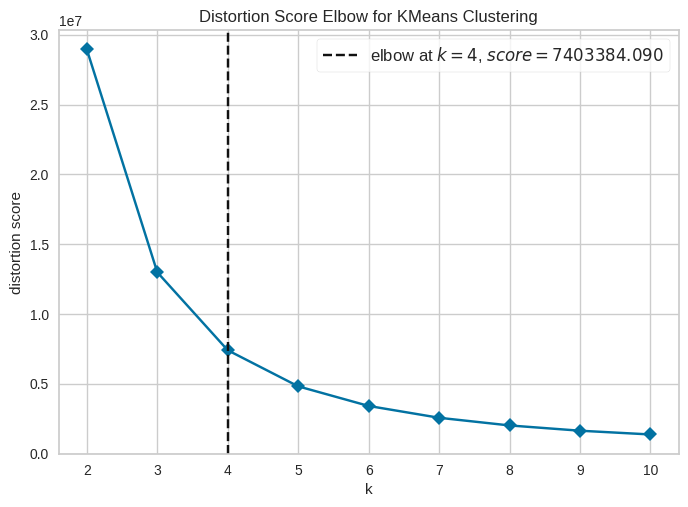

In [50]:
plot_model(kmeans, plot='elbow')

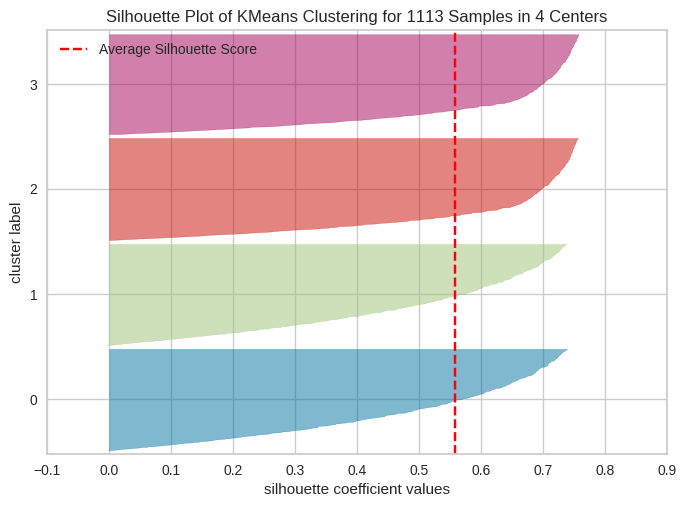

In [51]:
plot_model(kmeans, plot = 'silhouette')

In [52]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction

In [55]:
kmeans_imdb_pred = predict_model(kmeans, data=imdb_data)
kmeans_imdb_pred

,ID,Gender_Code,Region,Income,Spending,Cluster
0,1.0,0.0,0.0,20.0,15.0,Cluster 2
1,2.0,1.0,0.0,5.0,12.0,Cluster 2
2,3.0,0.0,1.0,28.0,18.0,Cluster 2
3,4.0,1.0,1.0,40.0,10.0,Cluster 2
4,5.0,1.0,1.0,42.0,9.0,Cluster 2
...,...,...,...,...,...,...
1108,1109.0,0.0,1.0,33.0,16.0,Cluster 3
1109,1110.0,1.0,1.0,48.0,7.0,Cluster 3
1110,1111.0,1.0,1.0,31.0,16.0,Cluster 3
1111,1112.0,1.0,1.0,50.0,14.0,Cluster 3


## Save Model

In [56]:
save_model(kmeans, 'kmeans_imdb_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ID', 'Income', 'Spending'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender_Code', 'Region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender_Code', 'Region'],
                                     transformer=OrdinalEncoder(cols=['Gender_Code',
                                                                      'Region'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender_Code',
                                                                          'data_type': dtype('O')

In [57]:
kmeans_imdb_pipeline = load_model('kmeans_imdb_pipeline')
kmeans_imdb_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ID', 'Income', 'Spending'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender_Code', 'Region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender_Code', 'Region'],
                                    transformer=OrdinalEncoder(cols=['Gender_Code',
                                                                     'Region'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender_Code',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'Region',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Rural    0
Urban    1
NaN     -1
dtype: int64}]))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])